In [35]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table

In [36]:
hdul = fits.open('Cone_GaiaDR3_G345.fits')
hdul = hdul[1].data
t = Table(hdul)

In [37]:
plx=t['parallax']
plx_error = t['parallax_error']
dist = 1./plx

In [38]:
# ---- BASIC MASKS ----
finite = np.isfinite(plx)
use = finite

# Optional: require positive parallax
#use &= (plx > 0)

# Optional: apply S/N cut, e.g. ϖ/σϖ ≥ 5
#if 'plx_err' in locals():
    #good_err = np.isfinite(plx_err) & (plx_err > 0)
    #use &= good_err & ((plx / plx_err) >= 5)

plx_use = plx[use]
print(f"Using {plx_use.size} sources")

Using 72220 sources


In [39]:
# ---- CHOOSE BINS ----
# Freedman–Diaconis rule usually gives a nice automatic binning for skewed data
bins = np.histogram_bin_edges(plx_use, bins='fd')  # you can also use an int, e.g. bins=50


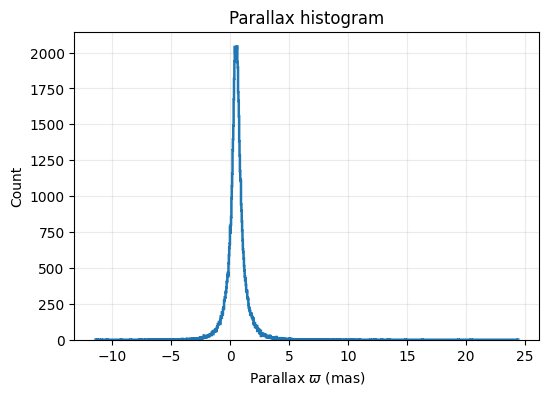

In [40]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(plx, bins=bins, histtype='step', linewidth=1.8)
ax.set_xlabel(r'Parallax $\varpi$ (mas)')
ax.set_ylabel('Count')
ax.set_title('Parallax histogram')
ax.grid(alpha=0.25)

plt.savefig('gaiadr3_plx_hist_g345.png', bbox_inches='tight')
plt.show()

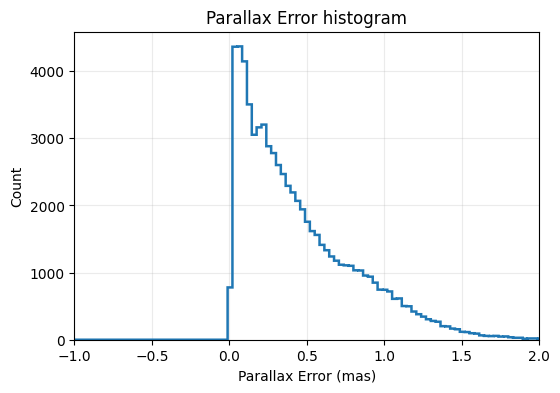

In [31]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(plx_error, bins=bins, histtype='step', linewidth=1.8)
ax.set_xlim(-1,2)
ax.set_xlabel(r'Parallax Error (mas)')
ax.set_ylabel('Count')
ax.set_title('Parallax Error histogram')
ax.grid(alpha=0.25)

plt.savefig('gaiadr3_scatter_g345.png', bbox_inches='tight')

plt.show()

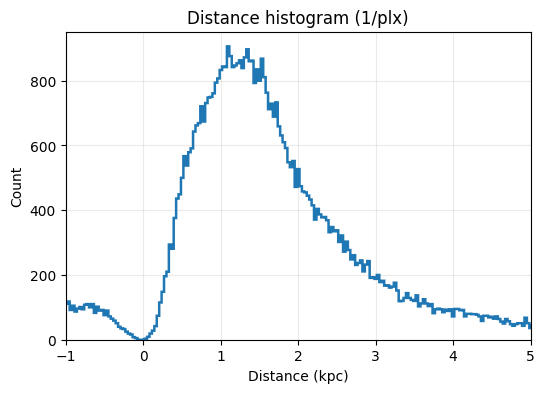

In [34]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(dist, bins=bins, histtype='step', linewidth=1.8)
ax.set_xlim(-1,5)
ax.set_xlabel(r'Distance (kpc)')
ax.set_ylabel('Count')
ax.set_title('Distance histogram (1/plx)')
ax.grid(alpha=0.25)

# Optional: show median
#med = np.median(plx_error)
#ax.axvline(med, color='tab:red', linestyle='--', linewidth=1.2, label=f'median = {med:.3f} mas')
#ax.legend()

plt.show()